Import all needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import TensorBoard
from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Create a function for plotting the the digits in grayscale

In [2]:
def plot_numbers(X,Y,a=3,b=3,start=11037):
    """
    A functions that prints a few samples from the MNIST set.
    """
    fig, axarr = plt.subplots(a,b,dpi=400)
    fig.tight_layout()
    for i in np.arange(a):
        for j in np.arange(b):
            axarr[i,j].imshow(X[start,:,:,0], cmap='gray')
            axarr[i,j].set_title(str(Y[start]), fontsize=20)
            axarr[i,j].axis('off')
            start += 1
    plt.show()

Import and data and convert it into a format that can be used by the neural network.

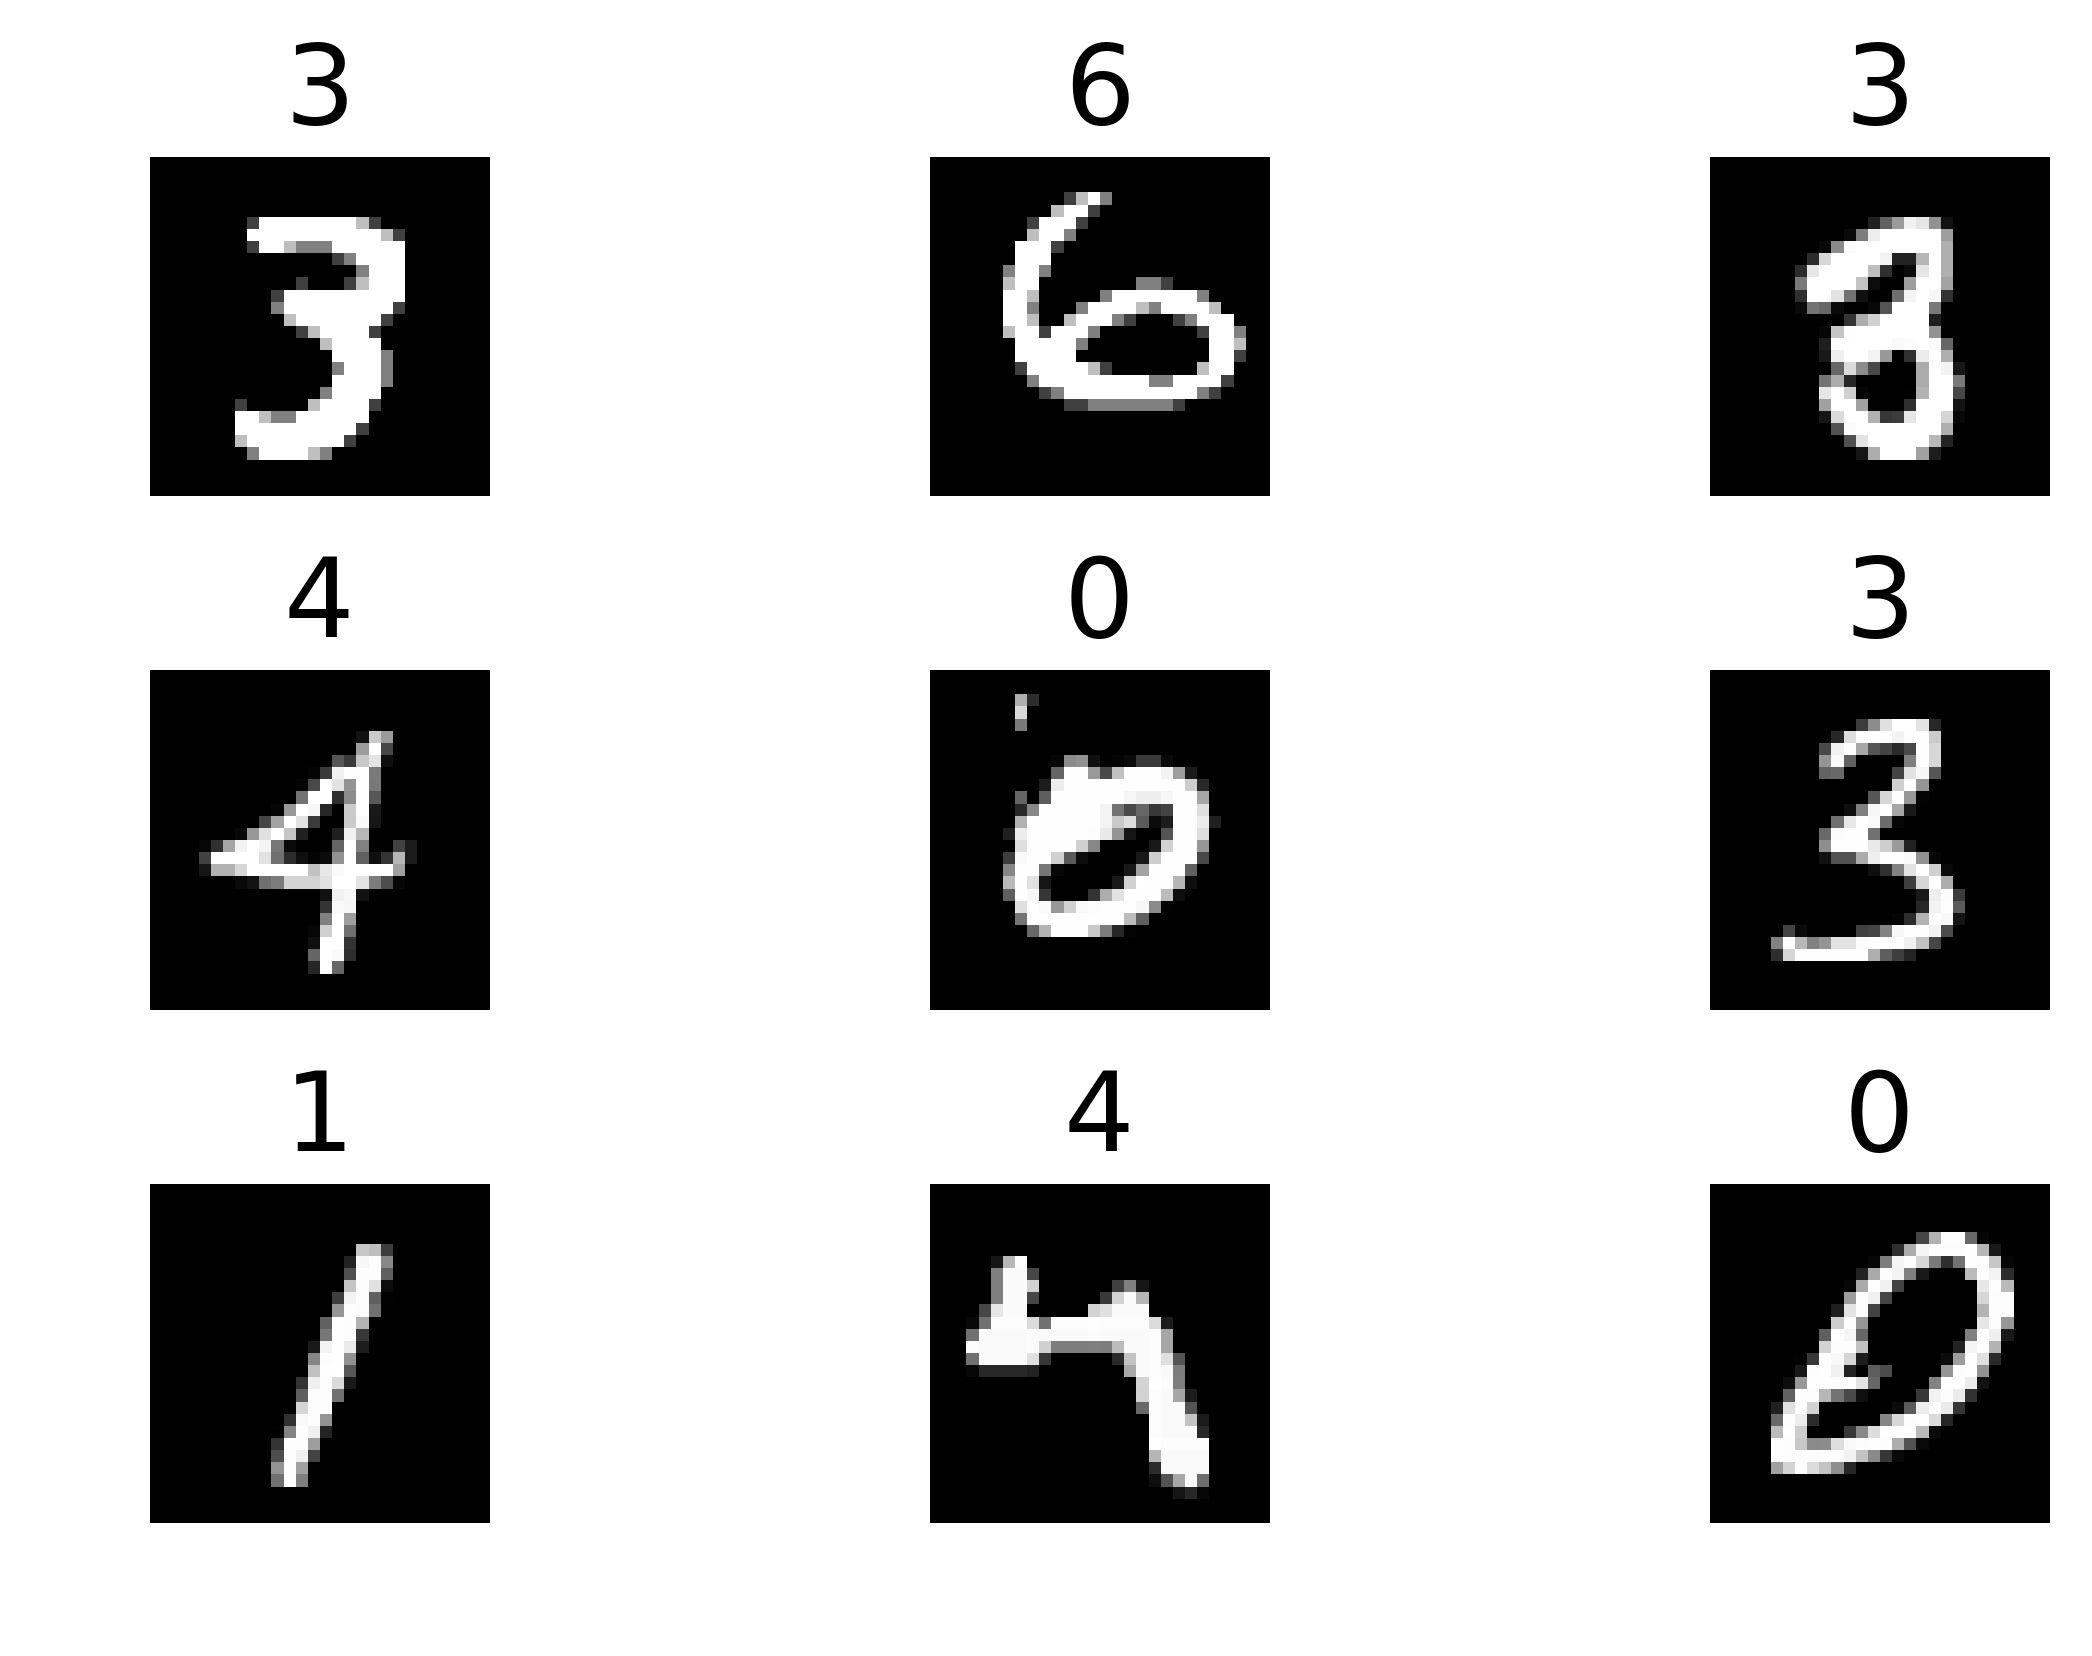

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()  #Load the data set
X_train = X_train.reshape(X_train.shape[0],28,28,1) #Reshape the data into the right form
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train = X_train.astype('float32') #Conver to the correct type
X_test = X_test.astype('float32')
X_train /= 255 #Rescale the data to be between [0,1] to achieve better convergence
X_test /= 255
plot_numbers(X_train, Y_train) #Plot a few of the numbers
Y_train = to_categorical(Y_train, 10) #Convert the labels to one-hot vectors
Y_test = to_categorical(Y_test, 10)

Decide on a neural network structure and build the graph.

In [4]:
Model = Sequential()
Model.add(Conv2D(64, (2, 2), activation='relu', input_shape=(28,28,1), name='Input_conv2x2_1'))
Model.add(MaxPooling2D((2,2), strides=(1,1), name='pooling2_1'))

Model.add(Conv2D(128, (1,1), activation='relu', name='conv1x1_2')) #1x1 conv for faster computation
Model.add(Conv2D(128, (3,3), padding='same', activation='relu', name='conv3x3_3'))
Model.add(MaxPooling2D((3,3), name='pooling3_2'))
Model.add(Conv2D(128, (2,2), padding='same', activation='relu', name='conv2x2_4'))

Model.add(Flatten(name='flattten'))
Model.add(Dropout(0.5))
Model.add(Dense(500, activation='relu', name='Dense_1'))
Model.add(Dropout(0.5))
Model.add(Dense(10, activation='softmax', name='Output')) #Output layer

In [5]:
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_conv2x2_1 (Conv2D)     (None, 27, 27, 64)        320       
_________________________________________________________________
pooling2_1 (MaxPooling2D)    (None, 26, 26, 64)        0         
_________________________________________________________________
conv1x1_2 (Conv2D)           (None, 26, 26, 128)       8320      
_________________________________________________________________
conv3x3_3 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
pooling3_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2x2_4 (Conv2D)           (None, 8, 8, 128)         65664     
_________________________________________________________________
flattten (Flatten)           (None, 8192)              0         
__________

Compile the graph with a loss function and optimizer.

In [6]:
Model.compile(loss='categorical_crossentropy', 
             optimizer='nadam', 
             metrics=['accuracy'])

Train the model on the training set and save Tensorboard logs.

In [7]:
Model.fit(X_train, 
          Y_train, 
          batch_size=64, 
          shuffle=True, 
          epochs=10, 
          validation_data=(X_test, Y_test),
          verbose=1,
          callbacks=[TensorBoard(log_dir='./tmp/logs')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1459 - acc: 0.9552 - val_loss: 0.0408 - val_acc: 0.9870
Epoch 2/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0616 - acc: 0.9810 - val_loss: 0.0355 - val_acc: 0.9885
Epoch 3/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0520 - acc: 0.9841 - val_loss: 0.0386 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0442 - acc: 0.9868 - val_loss: 0.0385 - val_acc: 0.9893
Epoch 5/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0375 - acc: 0.9884 - val_loss: 0.0222 - val_acc: 0.9933
Epoch 6/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0366 - acc: 0.9886 - val_loss: 0.0279 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0345 - acc: 0.9898 - val_loss: 0.0261 - 

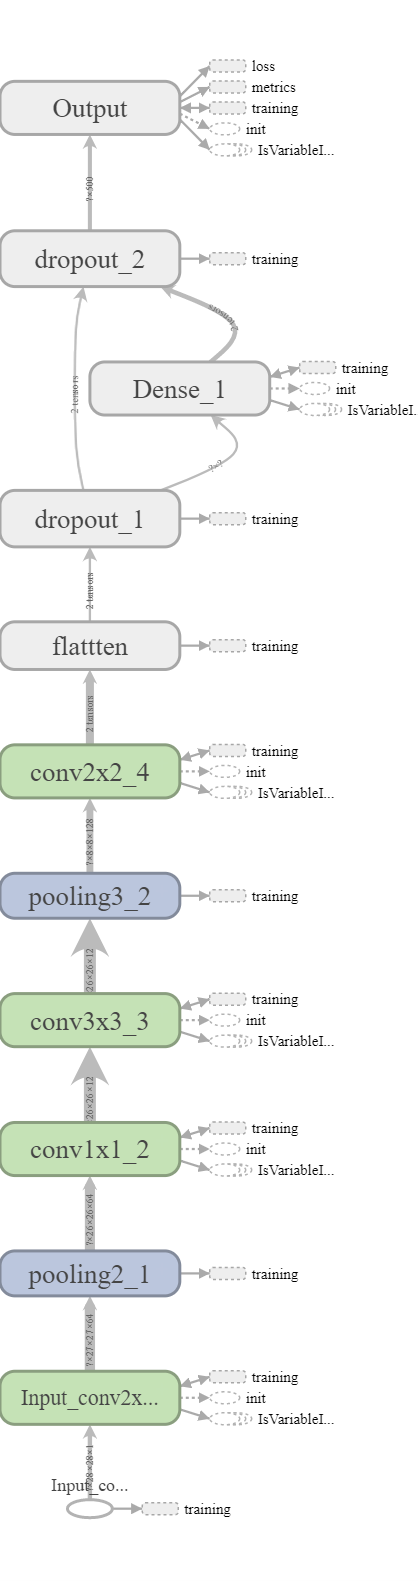

In [8]:
Image('./Model.png') #Network graph generated by tensorboard

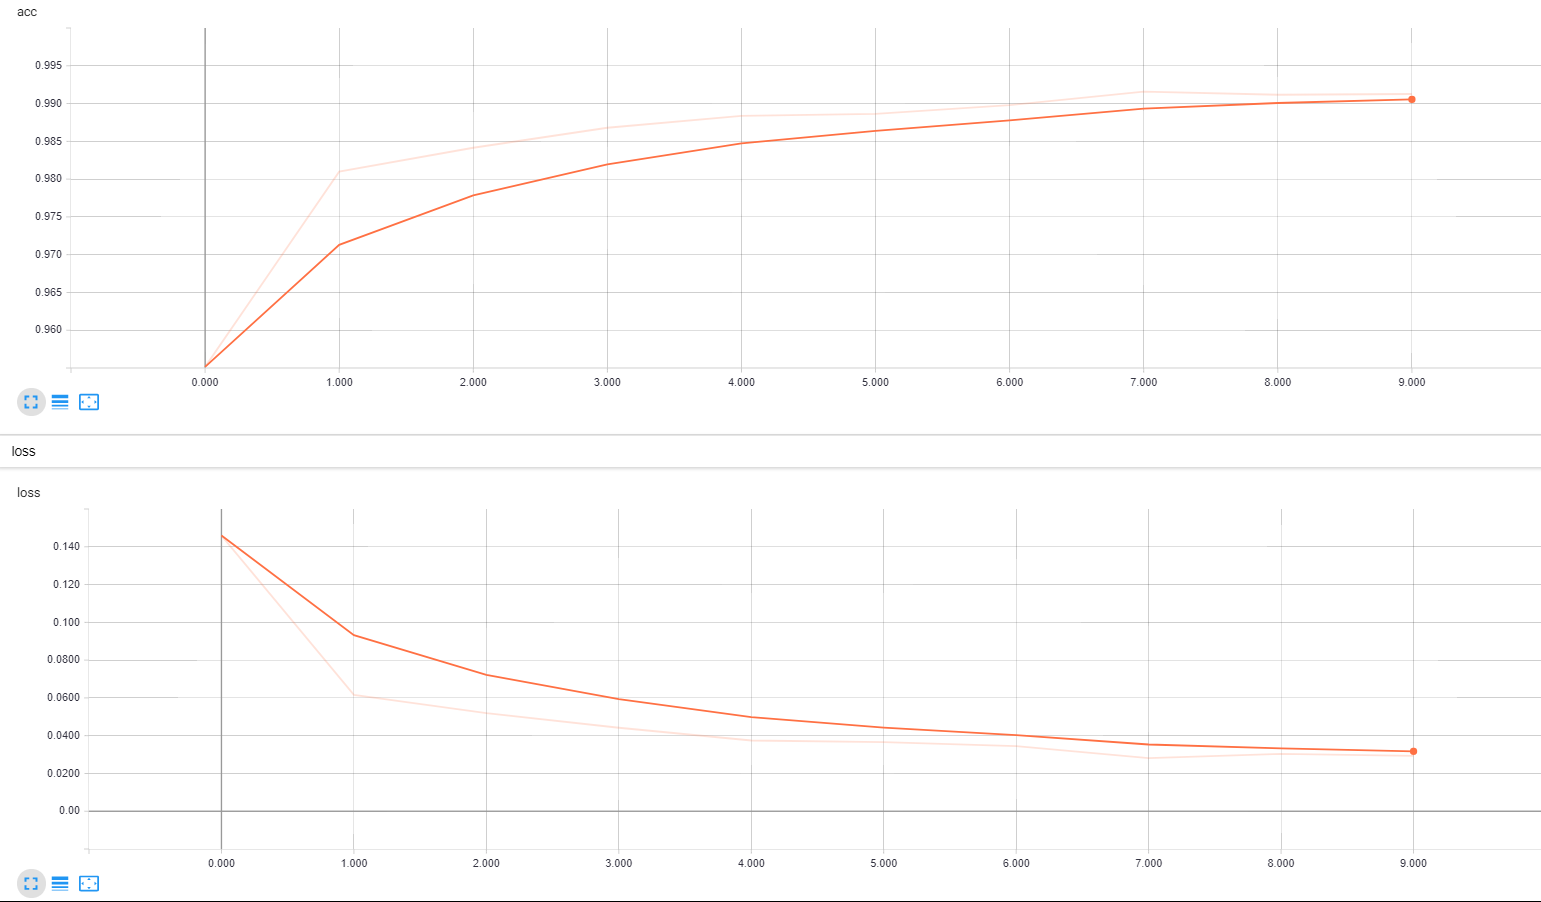

In [9]:
Image('./Training.png') #Loss and accuracy for the training set during learning

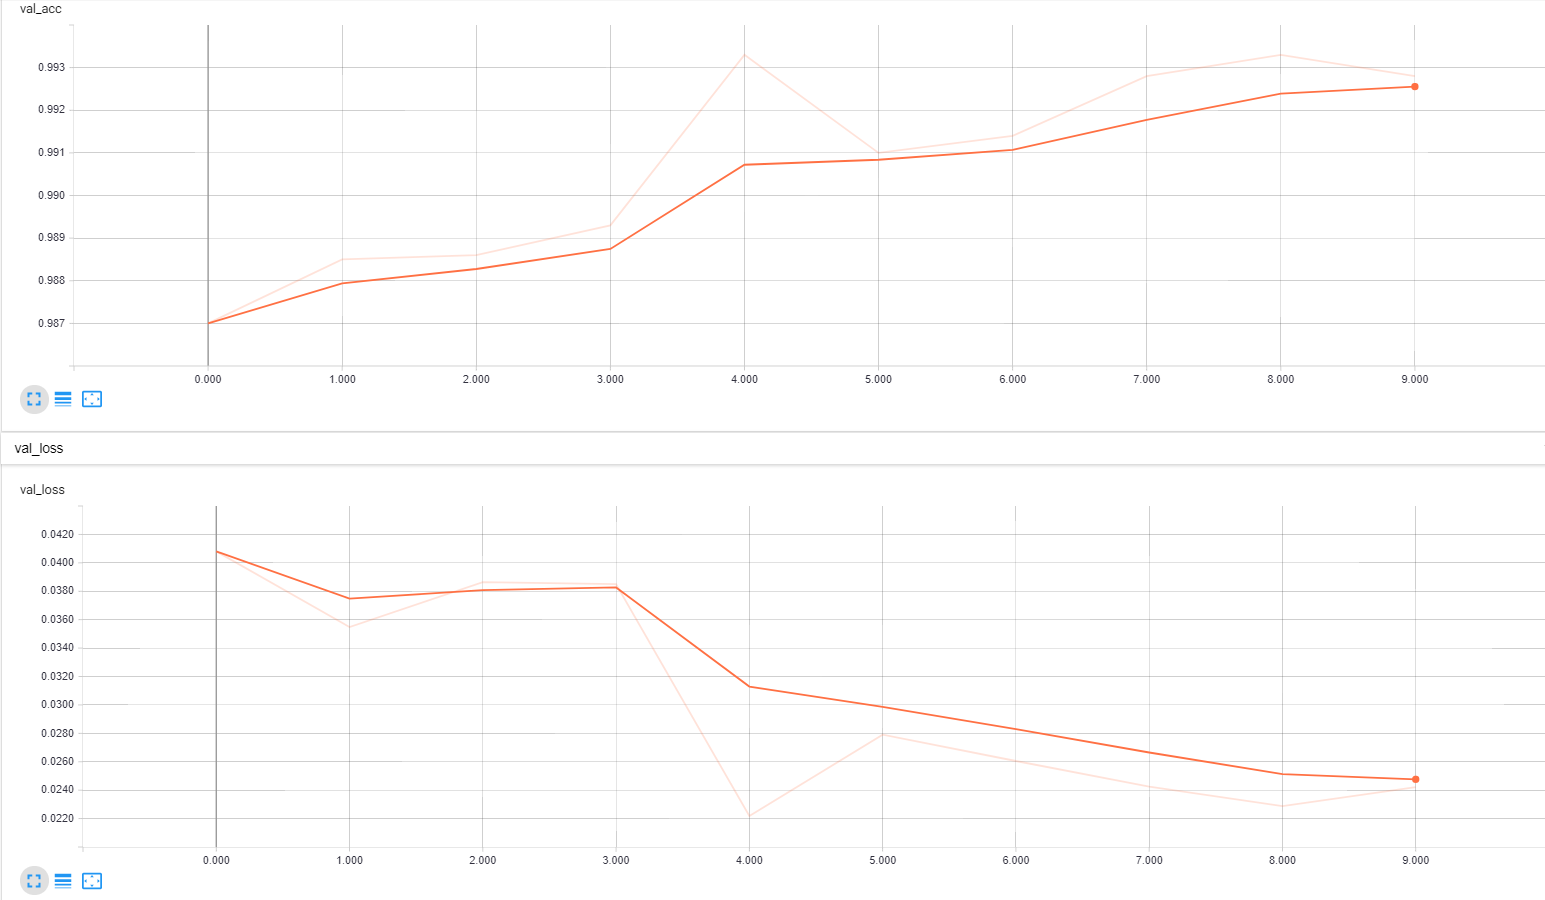

In [10]:
Image('./Validating.png') #Loss and accuracy for the validation set during learning

Having found a good network structure i recreated it for the final test.

In [11]:
Model = Sequential()
Model.add(Conv2D(64, (2, 2), activation='relu', input_shape=(28,28,1), name='Input_conv2x2_1'))
Model.add(MaxPooling2D((2,2), strides=(1,1), name='pooling2_1'))

Model.add(Conv2D(128, (1,1), activation='relu', name='conv1x1_2')) #1x1 conv for faster computation
Model.add(Conv2D(128, (3,3), padding='same', activation='relu', name='conv3x3_3'))
Model.add(MaxPooling2D((3,3), name='pooling3_2'))
Model.add(Conv2D(128, (2,2), padding='same', activation='relu', name='conv2x2_4'))

Model.add(Flatten(name='flattten'))
Model.add(Dropout(0.5))
Model.add(Dense(500, activation='relu', name='Dense_1'))
Model.add(Dropout(0.5))
Model.add(Dense(10, activation='softmax', name='Output')) #Output layer

In [12]:
Model.compile(loss='categorical_crossentropy', 
             optimizer='nadam', 
             metrics=['accuracy'])

Create a data generator so the new network can be trained on more data and achieve better performance.

In [13]:
 Datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by dataset std
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in 0 to 180 degrees
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [14]:
Model.fit_generator(
          Datagen.flow(X_train, Y_train, batch_size=64),
          shuffle=True, 
          epochs=10, 
          validation_data=(X_test, Y_test),
          verbose=1)

Epoch 1/10
938/938 [==============================] - 186s 198ms/step - loss: 0.2488 - acc: 0.9216 - val_loss: 0.0347 - val_acc: 0.9881
Epoch 2/10
938/938 [==============================] - 140s 149ms/step - loss: 0.1014 - acc: 0.9690 - val_loss: 0.0263 - val_acc: 0.9916
Epoch 3/10
938/938 [==============================] - 140s 150ms/step - loss: 0.0862 - acc: 0.9739 - val_loss: 0.0239 - val_acc: 0.9914
Epoch 4/10
938/938 [==============================] - 136s 145ms/step - loss: 0.0781 - acc: 0.9772 - val_loss: 0.0272 - val_acc: 0.9911
Epoch 5/10
938/938 [==============================] - 131s 139ms/step - loss: 0.0705 - acc: 0.9788 - val_loss: 0.0271 - val_acc: 0.9916
Epoch 6/10
938/938 [==============================] - 129s 138ms/step - loss: 0.0684 - acc: 0.9797 - val_loss: 0.0223 - val_acc: 0.9928
Epoch 7/10
938/938 [==============================] - 133s 141ms/step - loss: 0.0644 - acc: 0.9806 - val_loss: 0.0188 - val_acc: 0.9940
Epoch 8/10
938/938 [============================

After 10 epochs of learning it is obvious that adding artificialy created samples makes the network performe worse on the training set but better on the test set which means, that the model generalizes better. The quite significant difference between loss of training and test data suggests that further training is recommended.